In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('creditcard.csv')  # Replace with the actual path to your dataset
X = data.drop('Class', axis=1)
y = data['Class']

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components you want
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
# Resample the training data to handle class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_pca, y_train)

In [ ]:
# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)


In [9]:
# Predict on the test set
y_pred = clf.predict(X_test_pca)

In [10]:
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_pca)[:,1])
auprc = auc(recall, precision)


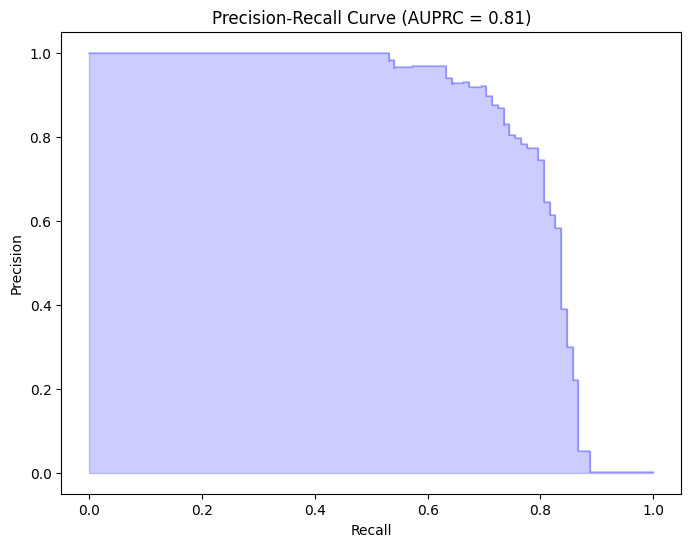

In [11]:
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUPRC = {:.2f})'.format(auprc))
plt.show()

In [12]:
print('Area Under the Precision-Recall Curve (AUPRC): {:.2f}'.format(auprc))

Area Under the Precision-Recall Curve (AUPRC): 0.81
